<a href="https://colab.research.google.com/github/Marudhan/MiniProject/blob/main/powerLifting_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df=pd.read_csv("/openpowerlifting-2021-12-10-b420db66.csv")
df.head()
print()


<ipython-input-19-01daa7ee6f73>:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/openpowerlifting-2021-12-10-b420db66.csv")


In [20]:
print(df)

                          Name Sex Event   Equipment   Age AgeClass  \
0                  Alona Vladi   F   SBD         Raw  33.0    24-34   
1           Galina Solovyanova   F   SBD         Raw  43.0    40-44   
2               Daniil Voronin   M   SBD         Raw  15.5    16-17   
3               Aleksey Krasov   M   SBD         Raw  35.0    35-39   
4       Margarita Pleschenkova   M   SBD         Raw  26.5    24-34   
...                        ...  ..   ...         ...   ...      ...   
614038       Austyn Montemayor   F   SBD  Single-ply   NaN    18-19   
614039         Crystal Collins   F   SBD  Single-ply   NaN      NaN   
614040     Dorislynn Edmundson   F   SBD  Single-ply   NaN      NaN   
614041          Kaitlyn Malina   F   SBD  Single-ply   NaN      NaN   
614042             Tori Toeppe   F   SBD  Single-ply   NaN    18-19   

       BirthYearClass Division  BodyweightKg WeightClassKg  ...  Tested  \
0               24-39        O         58.30            60  ...     Yes 

In [21]:
# header
list(df)

['Name',
 'Sex',
 'Event',
 'Equipment',
 'Age',
 'AgeClass',
 'BirthYearClass',
 'Division',
 'BodyweightKg',
 'WeightClassKg',
 'Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Best3SquatKg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Best3BenchKg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg',
 'Best3DeadliftKg',
 'TotalKg',
 'Place',
 'Dots',
 'Wilks',
 'Glossbrenner',
 'Goodlift',
 'Tested',
 'Country',
 'State',
 'Federation',
 'ParentFederation',
 'Date',
 'MeetCountry',
 'MeetState',
 'MeetTown',
 'MeetName']

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby("Dots")["State"].count()

,State
Dots,
10.17,0
10.21,0
10.50,0
11.88,0
12.71,0
...,...
744.02,0
744.63,0
744.65,0


In [23]:
df_men = df[df['Sex'] == 'M']
top_10_states_men = df_men['State'].value_counts().head(10)
print(top_10_states_men)

State
TX    9311
ON    8969
NY    5124
PA    5010
FL    4874
BC    4719
CA    4630
WI    4493
AB    4074
VA    4035
Name: count, dtype: int64


In [24]:
df_women = df[df['Sex'] == 'F']
top_10_states_women = df_women['State'].value_counts().head(10)
print(top_10_states_women)



State
TX    5147
WI    3937
ON    3663
NY    2756
PA    2348
CA    2283
FL    2277
LA    2166
VA    1923
AB    1822
Name: count, dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert 'Date' to datetime and 'Age' to numeric
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [26]:
# Top 10 states for Men
df_men_states = df[df["Sex"] == "M"].groupby(["State"]).size().to_frame("count").reset_index()
df_men_sorted = df_men_states.sort_values(by="count", ascending=False)
print("Top 10 states for Men")
print(tabulate(df_men_sorted.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Men
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 75 | TX      |    9311 |
| 54 | ON      |    8969 |
| 51 | NY      |    5124 |
| 56 | PA      |    5010 |
| 13 | FL      |    4874 |
|  5 | BC      |    4719 |
|  6 | CA      |    4630 |
| 82 | WI      |    4493 |
|  0 | AB      |    4074 |
| 77 | VA      |    4035 |
+----+---------+---------+


In [27]:
# Top 10 states for Women
df_women_states = df[df["Sex"] == "F"].groupby(["State"]).size().to_frame("count").reset_index()
df_women_sorted = df_women_states.sort_values(by="count", ascending=False)
print("Top 10 states for Women")
print(tabulate(df_women_sorted.head(10), headers='keys', tablefmt='psql'))


Top 10 states for Women
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 72 | TX      |    5147 |
| 79 | WI      |    3937 |
| 52 | ON      |    3663 |
| 49 | NY      |    2756 |
| 54 | PA      |    2348 |
|  6 | CA      |    2283 |
| 13 | FL      |    2277 |
| 25 | LA      |    2166 |
| 74 | VA      |    1923 |
|  0 | AB      |    1822 |
+----+---------+---------+


In [28]:
# Data for Top 21-30 states for Men
data_men_states = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
                    "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

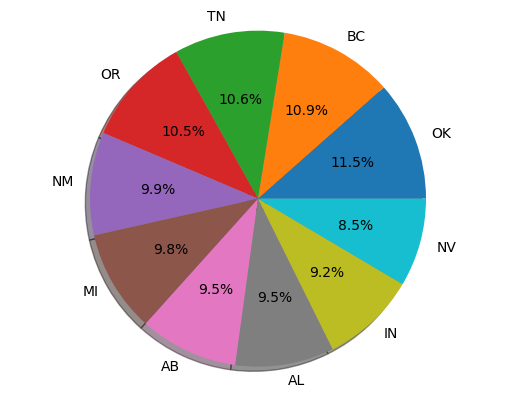

In [29]:
# Pie chart for Men Top 21-30 states
plt.pie(list(data_men_states.values()), labels=data_men_states.keys(), autopct='%2.1f%%', shadow=True, startangle=0)
plt.axis("equal")
plt.show()

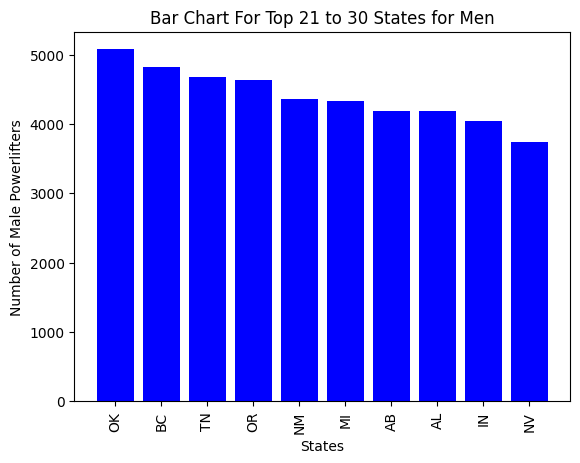

In [30]:
# Bar chart for Men Top 21-30 states
plt.bar(data_men_states.keys(), data_men_states.values(), color="blue")
plt.xlabel("States")
plt.ylabel("Number of Male Powerlifters")
plt.title("Bar Chart For Top 21 to 30 States for Men")
plt.xticks(rotation=90)
plt.show()

In [31]:
# Data for Top 21-30 states for Women
data_women_states = {"IL": 2184, "MA": 2174, "NJ": 2169, "MI": 2115, "AB": 1870,
                      "BC": 1744, "IN": 1733, "HI": 1717, "AL": 1343, "OK": 1337}


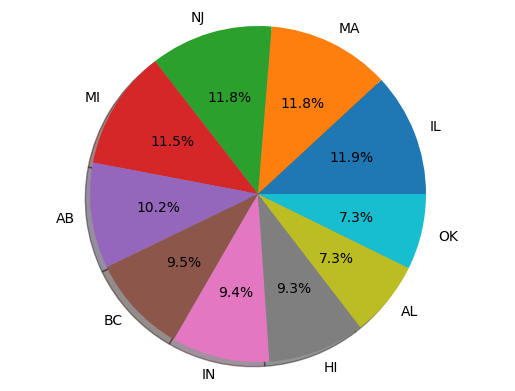

In [32]:
# Pie chart for Women Top 21-30 states
plt.pie(list(data_women_states.values()), labels=data_women_states.keys(), autopct='%2.1f%%', shadow=True, startangle=0)
plt.axis("equal")
plt.show()

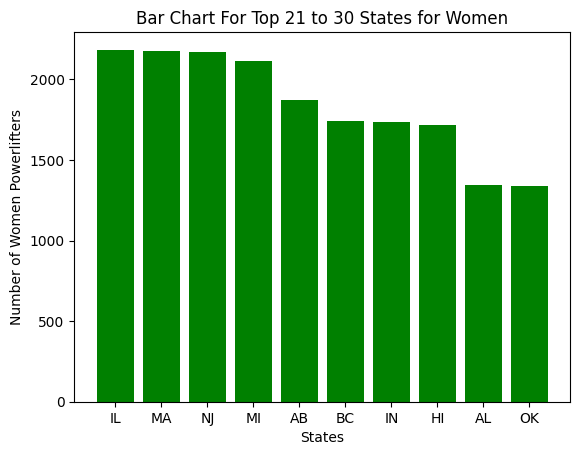

In [48]:
# Bar chart for Women Top 21-30 states
plt.bar(data_women_states.keys(), data_women_states.values(), color="green")
plt.xlabel("States")
plt.ylabel("Number of Women Powerlifters")
plt.title("Bar Chart For Top 21 to 30 States for Women")
plt.xticks(rotation=0)
plt.show()

In [34]:
# Convert the 'Date' column to string format
df['Date'] = df['Date'].astype(str)

# Now you can use the .str accessor
def top_10_states_by_year(df, year, sex):
    filtered_df = df[(df['Date'].str.contains(str(year))) & (df['Sex'] == sex)]
    return filtered_df['State'].value_counts().head(10)

# Get top 10 states for men in 2021
top_10_states_men_2021 = top_10_states_by_year(df, 2021, 'M')
print(top_10_states_men_2021)


State
TX    1514
FL     923
CA     659
NY     610
WI     544
LA     503
OH     484
MI     483
NC     478
NJ     478
Name: count, dtype: int64


In [35]:
# Define a custom function to get top 10 states by year and sex
def top_10_states_by_year(df, year, sex):
    filtered_df = df[(df['Date'].str.contains(str(year))) & (df['Sex'] == sex)]
    return filtered_df['State'].value_counts().head(10)

# Get top 10 states for men in 2021
top_10_states_men_2021 = top_10_states_by_year(df, 2021, 'M')
print(top_10_states_men_2021)


State
TX    1514
FL     923
CA     659
NY     610
WI     544
LA     503
OH     484
MI     483
NC     478
NJ     478
Name: count, dtype: int64


In [36]:
# Get top 10 states for women in 2021
top_10_states_women_2021 = top_10_states_by_year(df, 2021, 'F')
print(top_10_states_women_2021)


State
TX    809
FL    430
WI    404
NY    345
MI    340
NC    321
LA    309
CA    238
OH    207
MN    195
Name: count, dtype: int64


<ipython-input-37-447ba3287ffc>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_group = df.groupby(['AgeGroup', 'Sex']).size().unstack()


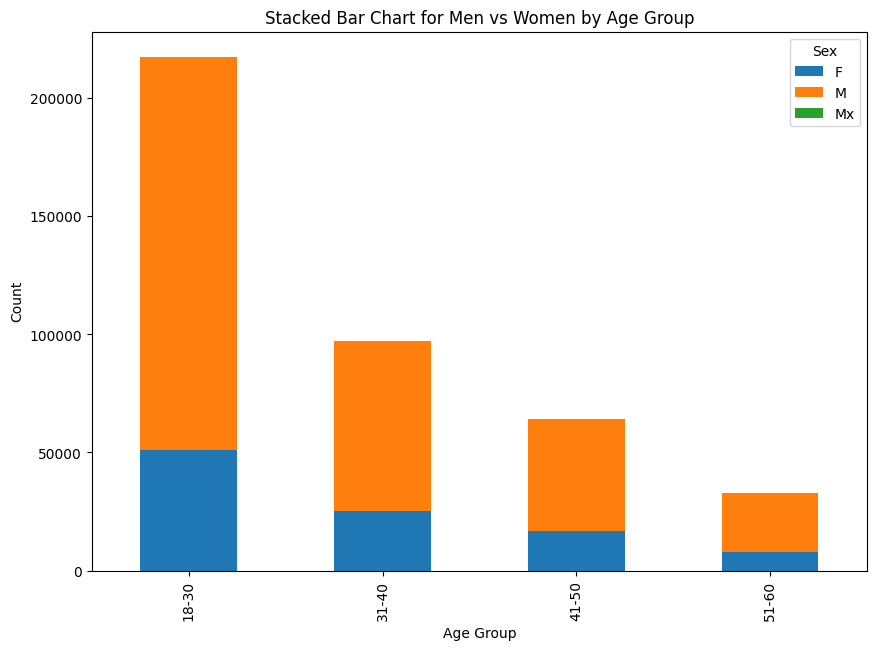

In [37]:
# Define age bins
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and Sex, then count
age_sex_group = df.groupby(['AgeGroup', 'Sex']).size().unstack()

# Plot the stacked bar chart
age_sex_group.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Stacked Bar Chart for Men vs Women by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


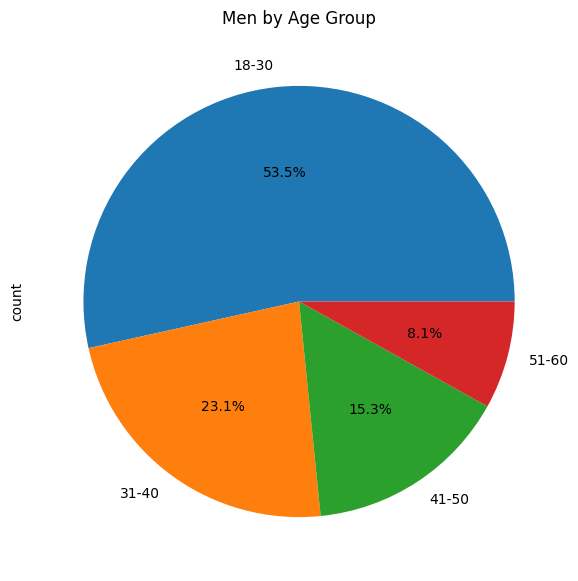

In [38]:
# Filter men by age group
men_age_group = df[df['Sex'] == 'M']['AgeGroup'].value_counts()

# Plot pie chart
plt.figure(figsize=(10,7))
men_age_group.plot.pie(autopct='%1.1f%%')
plt.title('Men by Age Group')
plt.show()


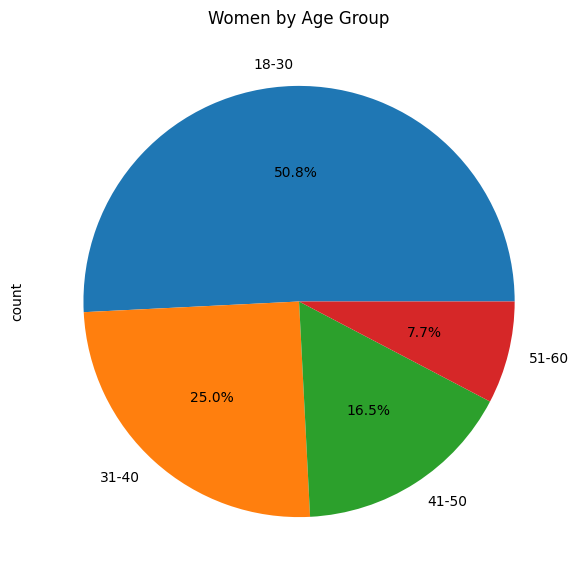

In [39]:
# Filter women by age group
women_age_group = df[df['Sex'] == 'F']['AgeGroup'].value_counts()

# Plot pie chart
plt.figure(figsize=(10,7))
women_age_group.plot.pie(autopct='%1.1f%%')
plt.title('Women by Age Group')
plt.show()


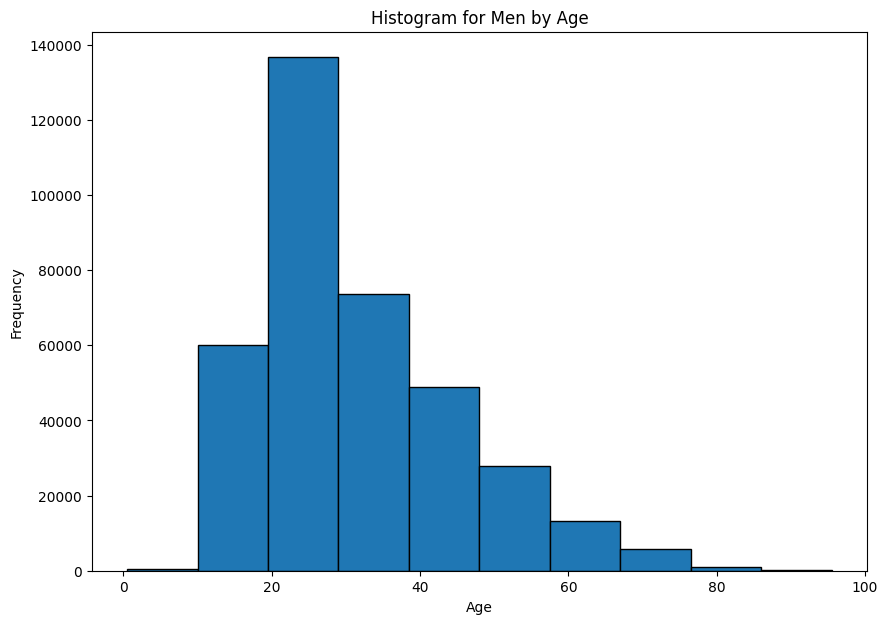

In [40]:
# Plot histogram for men by age
plt.figure(figsize=(10,7))
plt.hist(df_men['Age'], bins=10, edgecolor='black')
plt.title('Histogram for Men by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


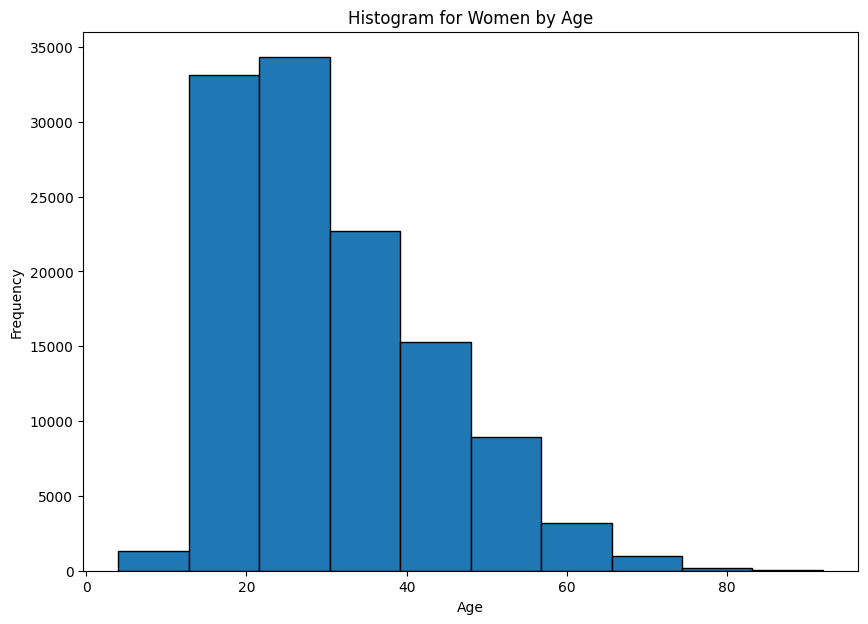

In [44]:
# Plot histogram for women by age
plt.figure(figsize=(10,7))
plt.hist(df_women['Age'], bins=10, edgecolor='black')
plt.title('Histogram for Women by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

